In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import pickle
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
SAVEE = "/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/"
# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:3]

['DC_a01.wav', 'DC_a03.wav', 'DC_a02.wav']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('Angry')
    elif i[-8:-6]=='_d':
        emotion.append('Disgust')
    elif i[-8:-6]=='_f':
        emotion.append('Fear')
    elif i[-8:-6]=='_h':
        emotion.append('Happy')
    elif i[-8:-6]=='_n':
        emotion.append('Neutral')
    elif i[-8:-6]=='sa':
        emotion.append('Sad')
    elif i[-8:-6]=='su':
        emotion.append('Surprise')
    else:
        emotion.append('Error') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['emotion'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.emotion.value_counts()


Neutral     120
Surprise     60
Disgust      60
Happy        60
Angry        60
Fear         60
Sad          60
Name: emotion, dtype: int64

In [10]:
df = pd.concat([SAVEE_df], axis = 0)
print(df.emotion.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Neutral     120
Surprise     60
Disgust      60
Happy        60
Angry        60
Fear         60
Sad          60
Name: emotion, dtype: int64


In [11]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
audio_df.sample(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,labels,source,path
118,Angry,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/JE_a01.wav
448,Happy,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/KL_h08.wav
452,Neutral,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/KL_n17.wav
378,Surprise,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/JK_su14.wav
300,Fear,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/JK_f12.wav
462,Neutral,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/KL_n02.wav
120,Surprise,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_su14.wav
141,Disgust,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/JE_d07.wav
429,Sad,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/KL_sa08.wav
13,Disgust,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_d05.wav


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


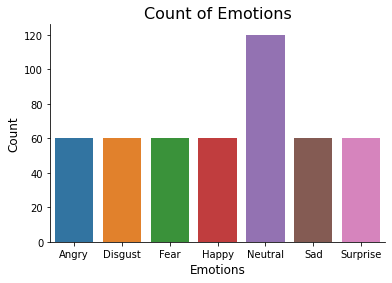

In [14]:


plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,emotion,source,path
0,Angry,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_a01.wav
1,Angry,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_a03.wav
2,Angry,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_a02.wav
3,Angry,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_a04.wav
4,Angry,SAVEE,/content/drive/MyDrive/Speech Emotion analysis/SAVEE_DATASET/AudioData/DC_a05.wav


In [15]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [30]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [31]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
       
    return result

In [34]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data2 = stretch(data)
    data_stretch_pitch = pitch2(new_data2, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically
    
    return result

In [35]:
X, Y = [], []
for path, emotion in zip(SAVEE_df.path, SAVEE_df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [36]:
len(X), len(Y), data_path.path.shape

(1920, 1920, (480,))

In [37]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,labels
0,0.038891,0.470030,0.577977,0.554338,0.482513,0.459260,0.483099,0.504528,0.459470,0.537165,0.543911,0.427620,0.375875,-263.466858,141.436203,9.218453,35.114113,9.297279,-8.656987,-37.015034,-6.304813,-4.120849,-18.487509,-5.460586,-2.153006,-3.739524,0.167713,7.115683,0.016670,0.049639,1.239522,23.517630,28.670458,24.047977,20.204424,6.152154,27.940865,52.672604,28.218454,37.908875,...,0.029865,0.040081,0.062012,0.055954,0.036728,0.046378,0.064503,0.036344,0.024409,0.015224,0.008851,0.009382,0.014248,0.020543,0.022496,0.020968,0.018010,0.014994,0.009880,0.003842,0.002254,0.001163,0.000567,0.000608,0.000600,0.000492,0.000343,0.000164,0.000086,0.000029,0.000008,0.000002,0.000002,0.000002,0.000002,0.000003,0.000004,0.000006,0.000006,Angry
1,0.040441,0.489374,0.597078,0.574154,0.504158,0.480332,0.495563,0.510171,0.473381,0.550172,0.551163,0.438417,0.393945,-216.477734,102.901990,22.280001,27.192533,8.777614,-10.317709,-27.448782,-9.456891,-5.447411,-16.084688,-7.262499,-1.222076,-4.051205,0.167764,7.123242,0.017416,0.050017,1.239593,23.542577,28.674403,24.056102,20.201921,6.140789,27.925449,52.672483,28.236628,37.921942,...,0.030372,0.040509,0.062319,0.056047,0.037130,0.047153,0.064852,0.037144,0.025615,0.016324,0.009593,0.010087,0.015100,0.021106,0.022609,0.021169,0.018681,0.015578,0.010435,0.004566,0.002874,0.001776,0.001266,0.001323,0.001315,0.001203,0.001087,0.000830,0.000762,0.000684,0.000683,0.000669,0.000691,0.000701,0.000687,0.000639,0.000631,0.000676,0.000660,Angry
2,0.032780,0.358427,0.503853,0.616884,0.561647,0.449090,0.437656,0.474661,0.471159,0.439736,0.539567,0.482916,0.362062,-309.003693,149.118607,6.478220,37.433662,0.464722,-14.599718,-41.104527,-3.112361,-8.859829,-20.847361,-3.414112,-0.224263,-4.389718,0.093830,7.007379,0.009440,0.017745,0.135506,5.051873,12.332873,7.280780,3.700567,1.297898,2.652237,11.422339,12.094018,5.692640,...,0.005622,0.006936,0.008122,0.013887,0.012968,0.009940,0.007260,0.010756,0.010511,0.006676,0.006412,0.002292,0.002058,0.002335,0.002600,0.004417,0.004369,0.004707,0.003281,0.003188,0.001295,0.000620,0.000307,0.000165,0.000090,0.000111,0.000116,0.000096,0.000063,0.000029,0.000015,0.000008,0.000005,0.000005,0.000005,0.000006,0.000008,0.000011,0.000012,Angry
3,0.034473,0.389227,0.534274,0.612222,0.536175,0.435317,0.465499,0.514174,0.477660,0.495830,0.573418,0.455242,0.349479,-308.332245,148.412827,6.236693,36.752964,1.611390,-13.439567,-40.369068,-3.212800,-7.672189,-21.376280,-4.840965,-1.644363,-4.818234,0.093833,7.010892,0.010448,0.019612,0.201054,5.214180,12.959225,7.590667,6.318485,2.142397,2.076422,11.062642,12.727839,6.910882,...,0.006185,0.007847,0.010733,0.013993,0.011773,0.009516,0.006708,0.011865,0.009869,0.006547,0.005678,0.001784,0.002225,0.003060,0.002961,0.004508,0.005086,0.004473,0.003314,0.002997,0.001122,0.000703,0.000324,0.000152,0.000107,0.000114,0.000105,0.000084,0.000048,0.000021,0.000009,0.000004,0.000002,0.000002,0.000002,0.000002,0.000003,0.000004,0.000005,Angry
4,0.034050,0.499476,0.400486,0.444634,0.500044,0.509017,0.532764,0.539512,0.576321,0.527569,0.560648,0.585721,0.580243,-286.720703,116.801147,-8.792378,28.029758,8.707914,-6.639419,-21.419628,8.668278,-1.643799,-11.762375,0.409033,-1.152655,-4.500133,0.195248,6.803538,0.149787,0.222301,0.347866,2.750036,23.239079,79.441887,87.672234,39.848942,5.586230,1.365460,25.718771,72.024788,...,0.007046,0.021464,0.019145,0.023110,0.028190,0.031688,0.062841,0.022915,0.018254,0.010510,0.006922,0.005532,0.007276,0.005546,0.004510,0.006971,0.005354,0.003299,0.002653,0.001480,0.001978,0.001349,0.000799,0.000798,0.000484,0.000294,0.000200,0.000117,0.000054,0.000020,0.000008,0.000005,0.000004,0.000004,0.000004,0.000005,0.000007,0.000009,0.000011,An

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((1536, 155), (1536,), (384, 155), (384,))

In [39]:
# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [40]:
# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [41]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

[[0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
(1536, 155, 1)
(384, 155, 1)


In [42]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype=object)

In [ ]:
# Define the K-fold Cross Validator
#kfold = KFold(n_splits=2, shuffle=True)
#acc_per_fold = []
#loss_per_fold = []
#inputs = np.concatenate((x_train, x_test), axis=0)
#targets = np.concatenate((y_train, y_test), axis=0)
#inputs.shape
#targets.shape

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train,y_train, batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 155, 256)          2304      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 74, 256)           1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 256)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 37, 256)          

9/9 [==============================] - 0s 6ms/step - loss: 2.3188 - accuracy: 0.8021
Loss of the model is -  2.3188095092773438
9/9 [==============================] - 0s 6ms/step - loss: 2.3188 - accuracy: 0.8021
Accuracy of the model is -  80.20833134651184 %


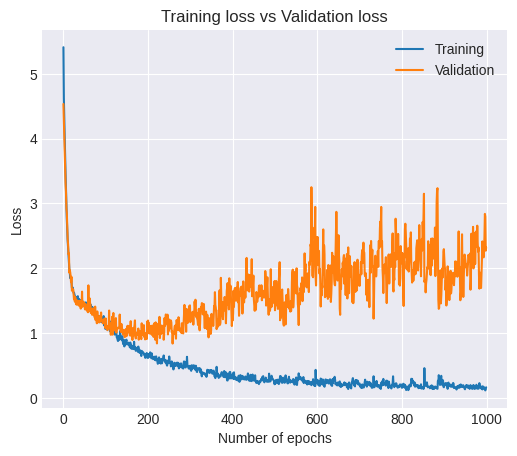

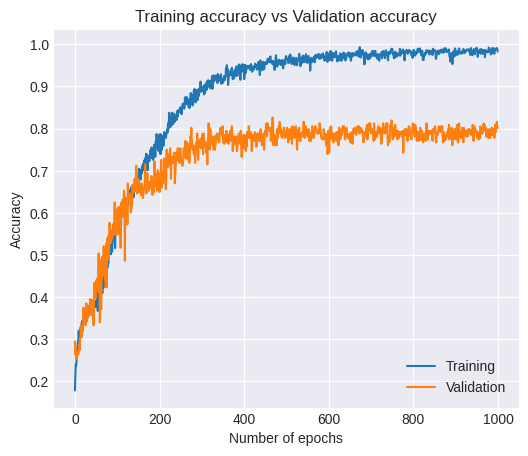

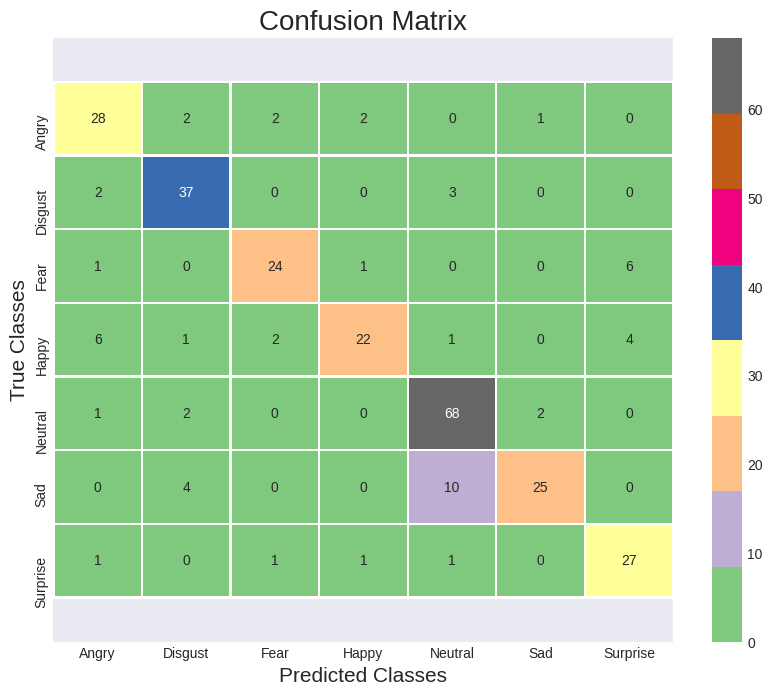

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 100 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 100 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (10, 8))
plt.rcParams['figure.dpi'] = 200 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-CHROMA.png')
plt.show() 

In [43]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train,y_train, batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 155, 256)          2304      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 74, 256)           1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 256)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 37, 256)          

12/12 [==============================] - 0s 13ms/step - loss: 0.4627 - accuracy: 0.9323
Loss of the model is -  0.4627465307712555
12/12 [==============================] - 0s 13ms/step - loss: 0.4627 - accuracy: 0.9323
Accuracy of the model is -  93.22916865348816 %


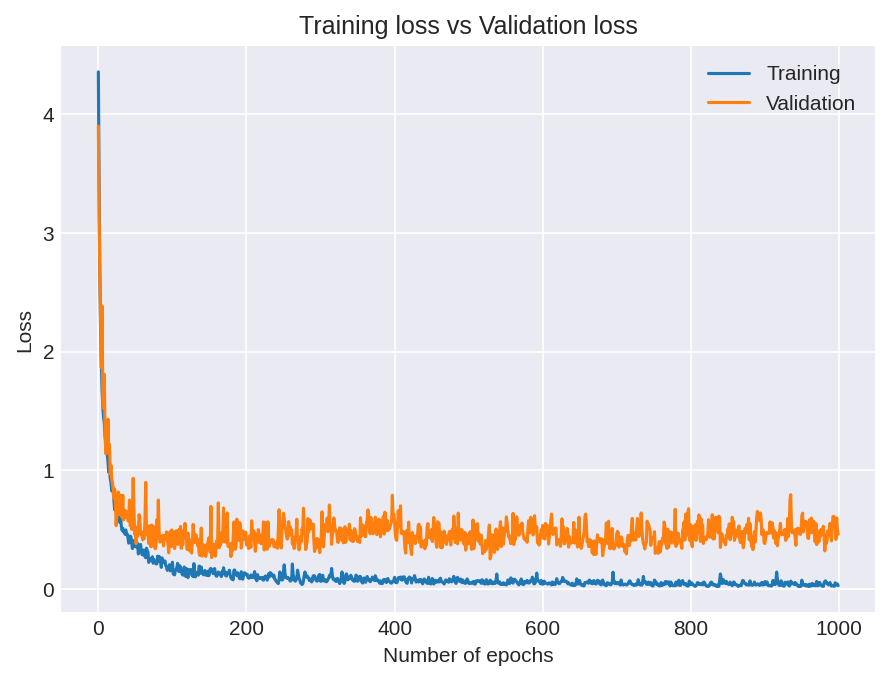

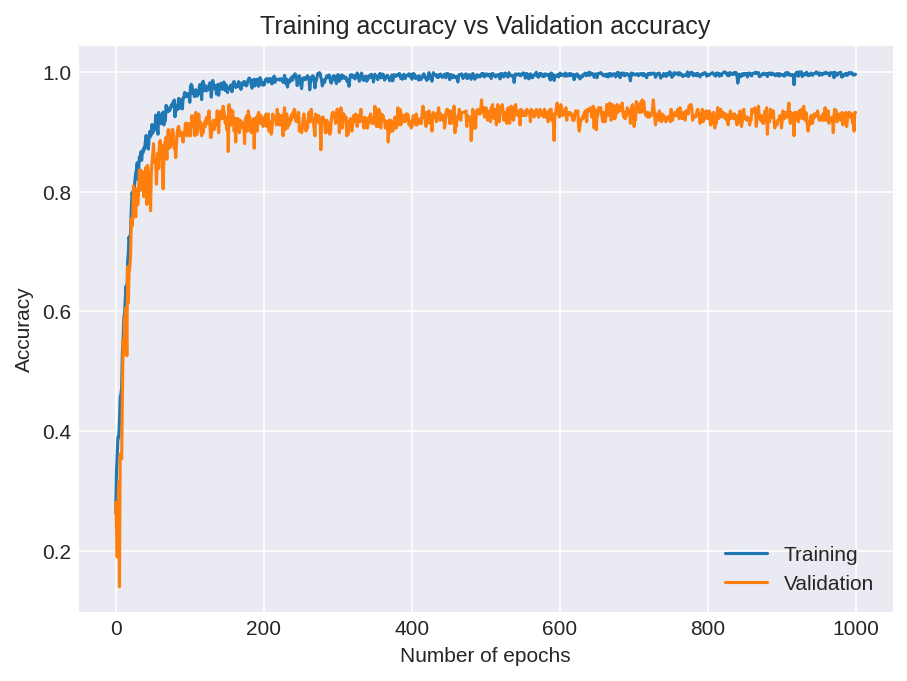

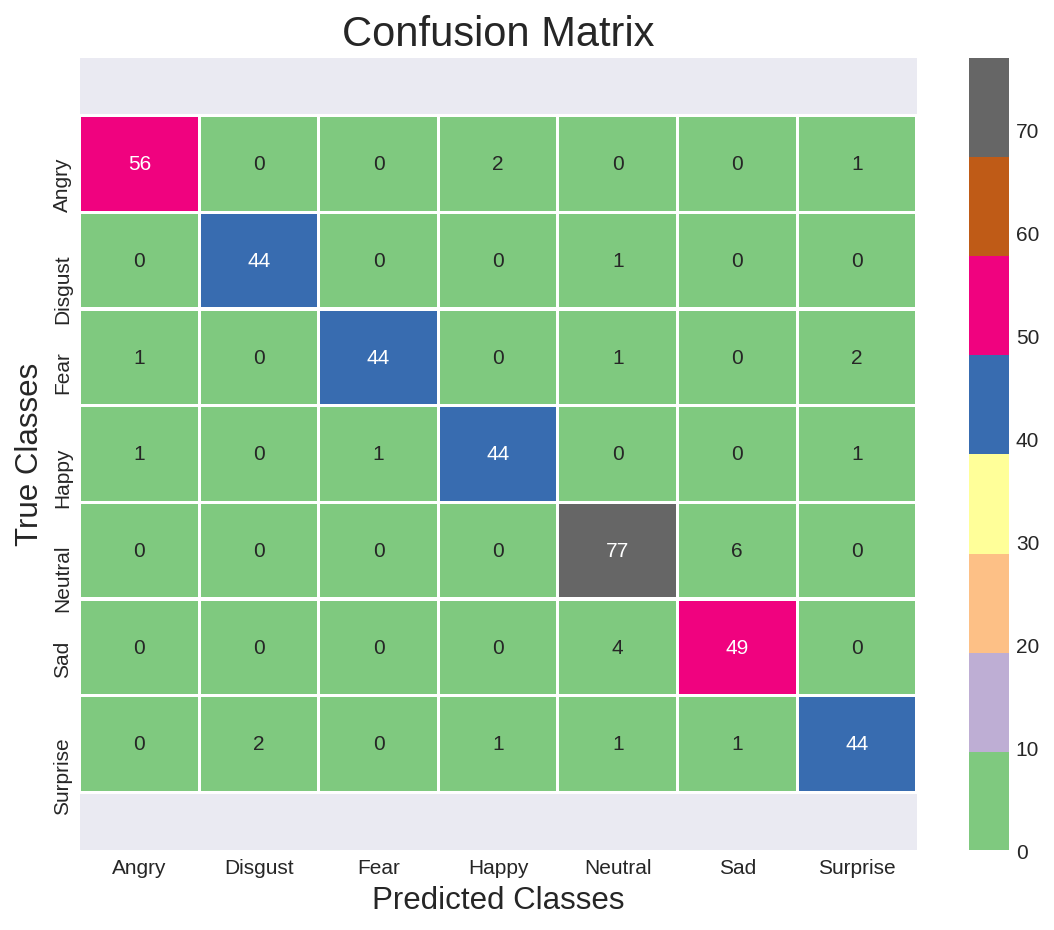

              precision    recall  f1-score   support

       Angry       0.97      0.95      0.96        59
     Disgust       0.96      0.98      0.97        45
        Fear       0.98      0.92      0.95        48
       Happy       0.94      0.94      0.94        47
     Neutral       0.92      0.93      0.92        83
         Sad       0.88      0.92      0.90        53
    Surprise       0.92      0.90      0.91        49

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384



In [45]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']))